In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dataset=pd.read_csv('D:\Datasets\Wine Quality\winequality-red.csv')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
976,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1034,8.9,0.745,0.18,2.5,0.077,15.0,48.0,0.99739,3.20,0.47,9.7,6
66,7.5,0.520,0.11,1.5,0.079,11.0,39.0,0.99680,3.42,0.58,9.6,5
1559,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
707,7.4,0.490,0.19,3.0,0.077,16.0,37.0,0.99660,3.37,0.51,10.5,5
1508,7.1,0.270,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6
776,6.9,0.765,0.18,2.4,0.243,5.5,48.0,0.99612,3.40,0.60,10.3,6
1318,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6
884,8.8,0.610,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6
1551,7.1,0.670,0.00,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,5


In [5]:
dataset.shape

(1599, 12)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis and Visulaization

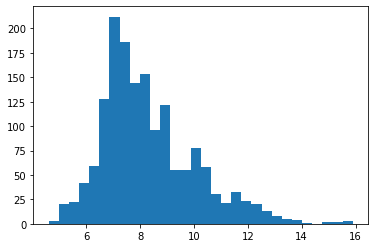

In [8]:
plt.hist(dataset['fixed acidity'], bins=30)
plt.show()

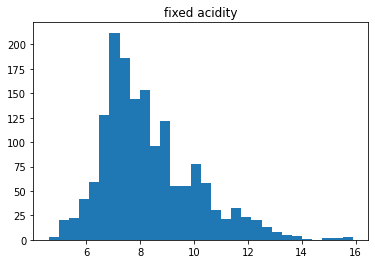

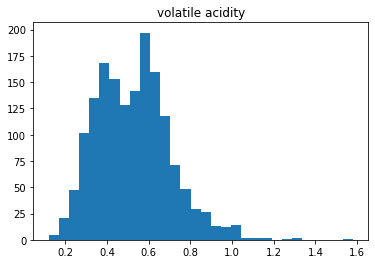

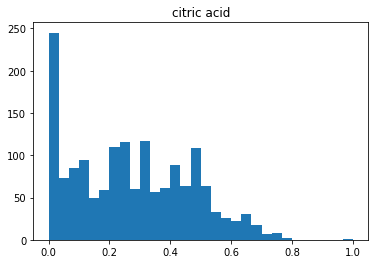

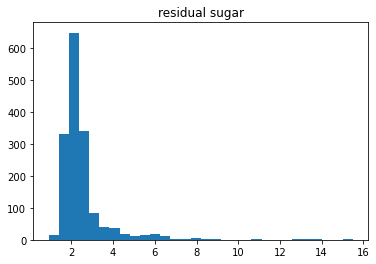

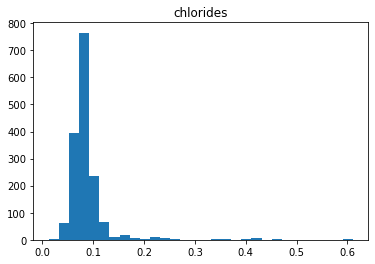

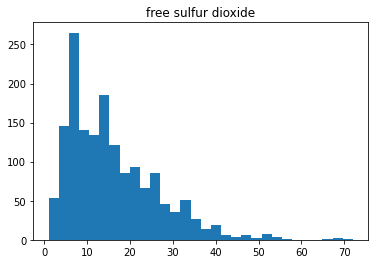

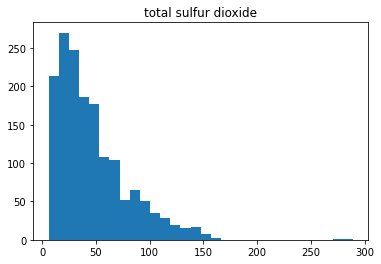

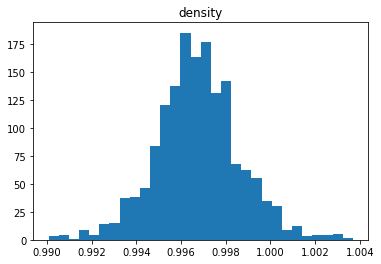

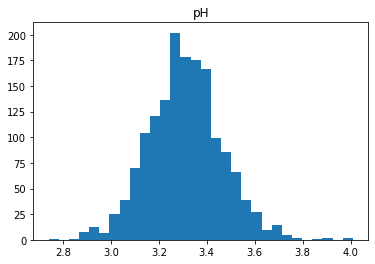

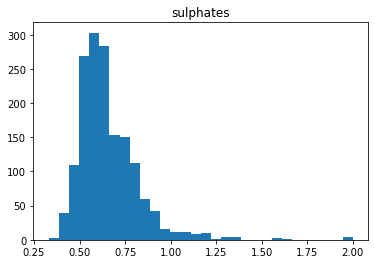

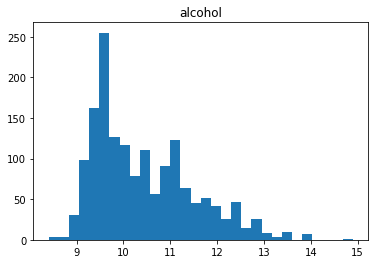

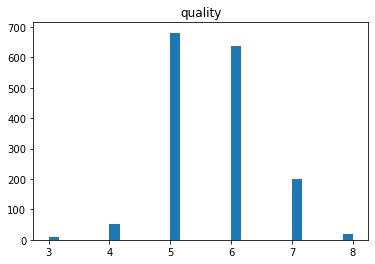

In [9]:
for col in dataset.columns:
    plt.hist(dataset[col], bins=30)
    plt.title(col)
    plt.show()

In [10]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

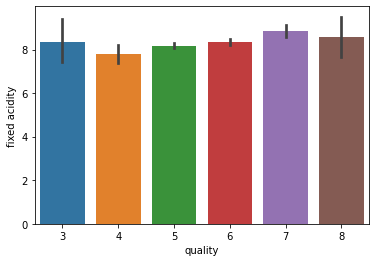

In [11]:
sns.barplot(x='quality', y='fixed acidity', data=dataset)
plt.show()

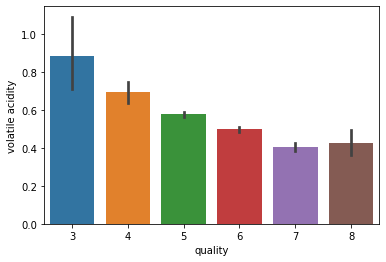

In [12]:
sns.barplot(x='quality', y='volatile acidity', data=dataset)
plt.show()

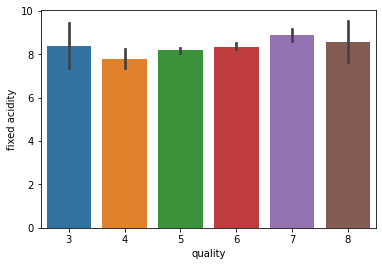

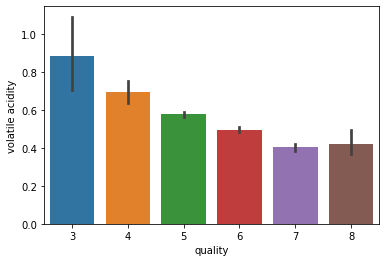

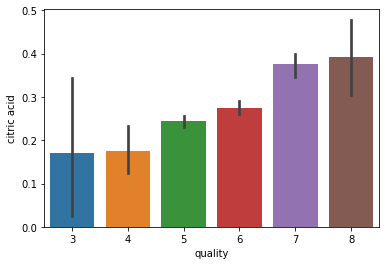

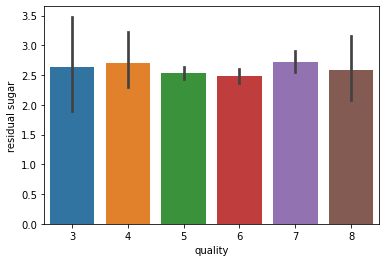

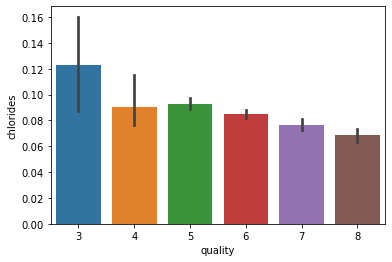

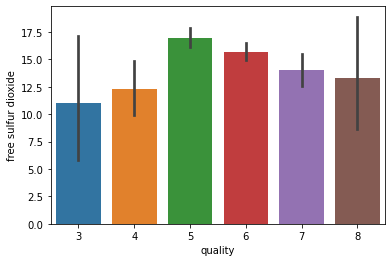

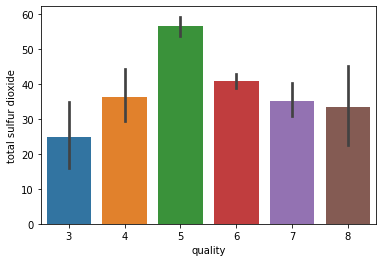

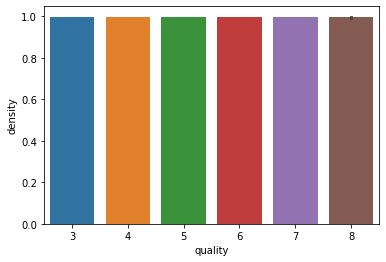

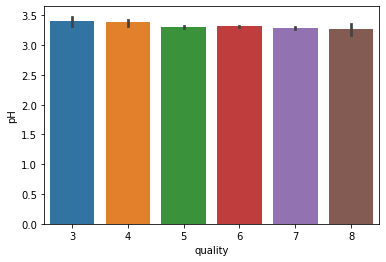

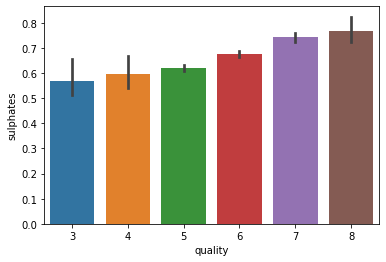

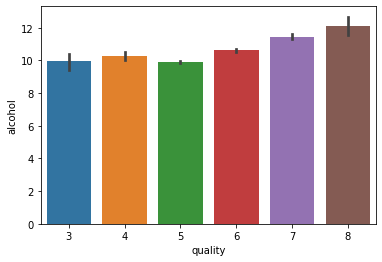

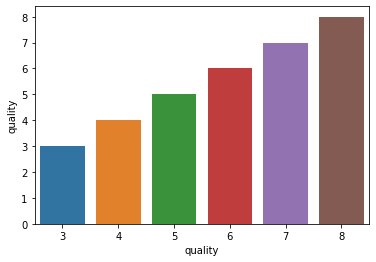

In [13]:
for col in dataset.columns:
    sns.barplot(x='quality', y=col, data=dataset)
    plt.show()

### Correlation

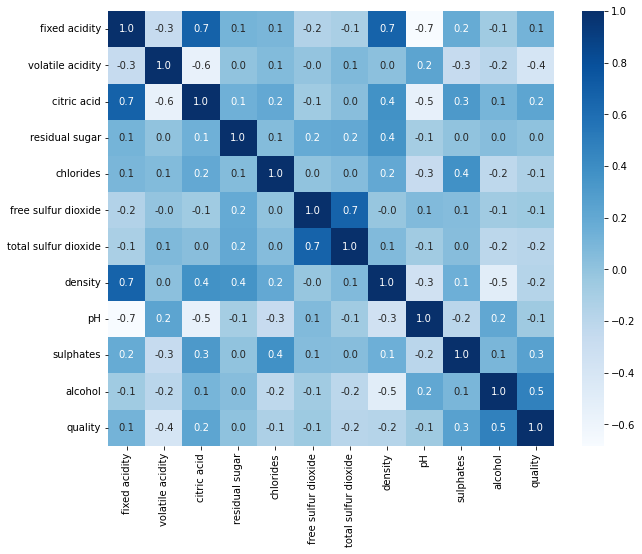

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, fmt='.1f', cmap='Blues')
plt.show()

### Binary Classification of Target Variable

In [15]:
bins=[2,6.2,8]
group_name=['Bad', 'Good']

In [16]:
dataset['quality']=pd.cut(dataset['quality'], bins=bins, labels=group_name)

In [17]:
dataset.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1257,7.0,0.580,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0,Bad
574,10.6,0.340,0.49,3.2,0.078,20.0,78.0,0.99920,3.19,0.70,10.0,Bad
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,Bad
1060,11.6,0.230,0.57,1.8,0.074,3.0,8.0,0.99810,3.14,0.70,9.9,Bad
586,11.1,0.310,0.49,2.7,0.094,16.0,47.0,0.99860,3.12,1.02,10.6,Good
1331,7.8,0.870,0.26,3.8,0.107,31.0,67.0,0.99668,3.26,0.46,9.2,Bad
148,6.9,0.490,0.10,2.3,0.074,12.0,30.0,0.99590,3.42,0.58,10.2,Bad
51,6.6,0.520,0.04,2.2,0.069,8.0,15.0,0.99560,3.40,0.63,9.4,Bad
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,Good
470,13.0,0.320,0.65,2.6,0.093,15.0,47.0,0.99960,3.05,0.61,10.6,Bad


### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
dataset['quality']=le.fit_transform(dataset['quality'])

In [20]:
dataset.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1591,5.4,0.740,0.09,1.70,0.089,16.0,26.0,0.99402,3.67,0.56,11.600000,0
382,8.3,0.260,0.42,2.00,0.080,11.0,27.0,0.99740,3.21,0.80,9.400000,0
1441,7.4,0.785,0.19,5.20,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667,0
1356,6.1,0.340,0.25,1.80,0.084,4.0,28.0,0.99464,3.36,0.44,10.100000,0
818,7.1,0.715,0.00,2.35,0.071,21.0,47.0,0.99632,3.29,0.45,9.400000,0


In [21]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

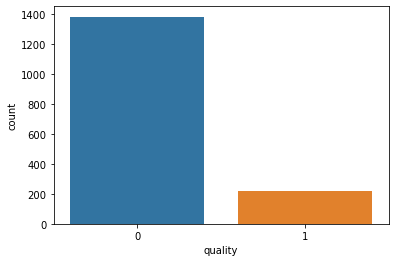

In [22]:
sns.countplot(dataset['quality'])

### Observation: Data is biased

In [23]:
X=dataset.drop('quality', axis=1)

In [24]:
print(X.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [25]:
y=dataset['quality']

In [26]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [30]:
print(X_train)

[[ 0.21833164  0.88971201  0.19209222 ...  1.09349989  0.45822284
   1.12317723]
 [-1.29016623 -1.78878251  0.65275338 ... -0.40043872 -0.40119696
   1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 ... -0.07566946  0.51551749
  -0.58738978]
 ...
 [-0.65195559  0.49909822 -1.08752211 ...  1.28836145 -0.68767023
  -0.87248428]
 [-0.24582155 -1.84458448  0.39683051 ...  0.05423824  0.80199076
   1.40827174]
 [-1.46422367 -1.34236676 -0.06383064 ...  0.50891521 -0.68767023
   2.92877575]]


In [31]:
print(X_test)

[[-3.33991288e-01  2.42581186e-01 -9.63136787e-01 ... -4.42561113e-01
   6.34928030e-02 -7.55088351e-01]
 [-2.78643172e-01 -9.49230728e-02 -4.94583756e-01 ...  5.19964189e-01
  -1.15964614e+00 -8.44713081e-01]
 [ 1.32645219e+00  8.61338994e-01 -2.34276516e-01 ... -1.85887699e-01
   2.23796204e+00 -4.86214161e-01]
 ...
 [-1.90259149e-03  4.67584025e-01 -7.80921719e-02 ... -1.02007629e+00
  -8.19885325e-01 -5.75838891e-01]
 [ 2.74837989e-01 -1.38868940e+00  6.50768099e-01 ... -1.02007629e+00
   2.67349294e-01  6.78907330e-01]
 [ 4.40882337e-01  1.39572074e+00 -1.17138258e+00 ... -1.21719346e-01
  -7.51933161e-01 -6.65463621e-01]]


### Model Training

#### Random Forest Classifier

In [32]:
rff=RandomForestClassifier()
rff.fit(X_train, y_train)
y_pred=rff.predict(X_test)

In [33]:
print('Accuracy of RFF:', accuracy_score(y_pred, y_test))

Accuracy of RFF: 0.871875


In [34]:
print(confusion_matrix(y_test, y_pred))

[[264   9]
 [ 32  15]]


In [35]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       296
           1       0.32      0.62      0.42        24

    accuracy                           0.87       320
   macro avg       0.64      0.76      0.68       320
weighted avg       0.92      0.87      0.89       320



### Stochastic Gradient Decent Classifier

In [36]:
sgc=SGDClassifier(penalty=None)
sgc.fit(X_train, y_train)
pre_sgc=sgc.predict(X_test)

In [37]:
print(classification_report(y_test, pre_sgc))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       273
           1       0.39      0.34      0.36        47

    accuracy                           0.82       320
   macro avg       0.64      0.62      0.63       320
weighted avg       0.82      0.82      0.82       320



In [38]:
print(confusion_matrix(y_test, pre_sgc))

[[248  25]
 [ 31  16]]


In [39]:
print(accuracy_score(y_test, pre_sgc))

0.825


### Support Vector Classifier

In [40]:
svc=SVC()
svc.fit(X_train, y_train)
y_svc=svc.predict(X_test)

In [41]:
print(classification_report(y_test, y_svc))
print(confusion_matrix(y_test, y_svc))
print(accuracy_score(y_test, y_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]
0.875


#### Hyper Tuning on models to increase Accuracy

#### Grid Search CV

In [42]:
#Finding best parameters for our SVC model
#param={
#    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
#    'kernel':['linear', 'rbf'],
#    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
#}

#grid_svc=GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [43]:
#grid_svc.fit(X_train, y_train)

In [44]:
#Let's run our SVC again with the best parameters.
#svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
#svc2.fit(X_train, y_train)
#pred_svc2 = svc2.predict(X_test)
#print(classification_report(y_test, pred_svc2))

### Cross Validation Score for random forest and SGD

In [46]:
#Now lets try to do some evaluation for random forest model using cross validation.
#rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
#rfc_eval.mean()

In [57]:
input1= (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)
input2=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
print(input2)

(7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0)


In [58]:
input_data=np.asarray(input2)

In [50]:
print(input_data)

[7.500e+00 5.000e-01 3.600e-01 6.100e+00 7.100e-02 1.700e+01 1.020e+02
 9.978e-01 3.350e+00 8.000e-01 1.050e+01]


In [59]:
input_reshape=input_data.reshape(1,-1)

In [52]:
input_reshape

array([[7.500e+00, 5.000e-01, 3.600e-01, 6.100e+00, 7.100e-02, 1.700e+01,
        1.020e+02, 9.978e-01, 3.350e+00, 8.000e-01, 1.050e+01]])

In [60]:
prediction=rff.predict(input_reshape)

In [55]:
prediction[0]

0

In [61]:
if prediction[0]==0:
    print('Bad Quality Wine')
else:
    print('Good Quality Wine')

Bad Quality Wine
